# Penna Disk Solution

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy as ap

## Setting Constants

In [3]:
# defining some constants; G = c = 1

a = 0 # spin; |a| < 1
q = 0 # charge; 0 < q < 1; a^2 + q^2 < 1
M = 1 # mass;
rs = 2*M # schwarzchild radius; rs = 2GM/c^2

th0 = np.pi/2.

rh = M + np.sqrt(M**2 - a**2 - q**2) # radius of event horizon

rin = 20

# rotation rate as defined in Chakrabarti 1985 and Penna et al. 2005
## this is very important: typically between 0.707 and 0.710
xi = 0.7080

In [4]:
# define coordinate grid: r x theta x phi = 100 x 100 x 100

## all arrays should have dimensions r x theta x phi

n1 = 4800 # cells in the r direction
n2 = 400 # cells in the theta (polar coordinate) direction
n3 = 1 # cells in the phi direction

## Creating Our Coordinate Grid

In [5]:
## defining the metric

# creating the metric array (g_mu_nu)
g = np.zeros((4,4,n1,n2,n3))


sm = 0.001
rmax = 2400

r = np.zeros((n1,n2,n3))
th = np.zeros((n1,n2,n3))
ph = np.zeros((n1,n2,n3))

r_ = np.logspace(np.log10(rh+sm), np.log10(rmax), n1, base = 10.0)
th_ = np.linspace(sm, np.pi-sm, n2)
ph_ = np.linspace(sm, 2*np.pi-sm,n3)

In [6]:
for j in range(n2):
    for k in range(n3):
        r[:,j,k] = r_
        
for i in range(n1):
    for k in range(n3):
        th[i,:,k] = th_        

for i in range(n1):
    for j in range(n2):
        ph[i,j,:] = ph_

In [7]:
rin_ind = (np.abs(r_-rin)).argmin()

## Defining Quantities

In [8]:
delta = r**2 - 2*M*r + a**2 + q**2 # (FM 3.5)
sigma = r**2 + a**2 * np.cos(th)**2 # (FM 3.5)
A = (r**2 + a**2)**2 - delta * a**2 *(np.sin(th)**2) # (FM 3.5)


# constants for the inner edge of the accretion disk
delta0 = rin**2 - 2*M*rin + a**2 + q**2 # (FM 3.5)
sigma0 = rin**2 + a**2 * np.cos(th0)**2 # (FM 3.5)
A0 = (rin**2 + a**2)**2 - delta0*(a**2)*(np.sin(th0)**2)

## Defining Metric

In [9]:
## kerr-newman metric in BL coordinates. 

g[0][0] = 2*r/sigma - 1 # dt^2
g[0][1] = 0 # dt dr
g[0][2] = 0 # dt dtheta
g[0][3] = -2*M*a*r*(np.sin(th)**2)/sigma # dt dphi

g[1][0] = 0 # dr dt
g[1][1] = sigma/delta # dr^2
g[1][2] = 0 # dr dtheta
g[1][3] = 0 # dr dphi

g[2][0] = 0 # dtheta dt
g[2][1] = 0 # dtheta dr
g[2][2] = sigma # dtheta^2
g[2][3] = 0 # dtheta dphi

g[3][0] = -2*M*a*r*(np.sin(th)**2)/sigma # dphi dt
g[3][1] = 0 # dphi dr
g[3][2] = 0 # dphi dtheta
g[3][3] = A*(np.sin(th)**2)/sigma # dphi^2

# metric is symmetric g[i][j] = g[j][i]

## determinant of the matrix is given by
gdet = - sigma**2 * np.sin(th)**2

## Variables, Functions and Calculations for Initial Conditions

In [10]:
xi = 0.7080

In [18]:
def l_mom(r, r1, r2, th):
    """
    Function to return the specific angular momentum value given a coordinate system and inner and outer
    boundaries for the accretion disk
        inputs: 
            r = r coordinate with all 3 dimensions (r * theta * phi)
            r1 = inner region of disk
            r2 = outer region of accretion disk
            th = theta coordinate
        outputs:
            angular momentum value for given lambda(s)
    """
    lam = np.sqrt(-g_pp/g_tt)
    
    F_ = 1 - 2*a/r**(1.5) + a**2 / r**2
    G_ = 1 - 2/r + a/r**(1.5)
    
    xi = 0.7080
    
    in_ind = (np.abs(r_-r1)).argmin()
    out_ind = (np.abs(r_-r2)).argmin()
    
    Fin = F_[in_ind, int(n2/2), 0]
    Fout = F_[out_ind, int(n2/2), 0]
    Gin = G_[in_ind, int(n2/2), 0]
    Gout = G_[out_ind, int(n2/2), 0]
    
    inner = (lam < r1)
    outer = (lam > r2)
    disk =  np.ones_like(r) - inner - outer

    mom1 = xi*inner*np.sqrt(r1)*Fin/Gin
    mom2 = xi*disk*np.sqrt(lam)*(F_/G_)
    mom3 = xi*outer*np.sqrt(r2)*Fout/Gout
    ang_mom = mom1 + mom2 + mom3
    
    ## keplerian velocity profile is r^-0.5. Keplerian angular momentum prof is r^0.5
    
    return ang_mom

def F_func(r,r1,r2,th,omega,l,I):
    """
    
    
    
    """
    
    """
    inner = (r*np.sin(th) < r1)
    outer = (r*np.sin(th) > r2)
    disk =  np.ones_like(r) - inner - outer
    
    f1 = inner*(1- omega*l)*I
    ## What is the value of this in the disk?
    f2 = disk*(1- omega*l)*I 
    f3 = outer*(1- omega*l)*I 
    big_F = f1 + f2 + f3
    """
    xi = 0.7080
    I = ((1-(xi**2)/r2)/(1-(xi**2)/r1))**0.5
    
    big_F = (1 - omega*l)*I
    
    return big_F

In [19]:
r_[rin_ind]

19.991058235651913

In [20]:
## needed terms from the metric

g_tt = g[0][0]
g_tp = g[0][3]
g_pp = g[3][3]

## expressions in the angular momentum equation

F = 1 - 2*a*r**(-1.5) + a**2 / r**2
G = 1 - 2/r + a/r**(1.5)


## same choices as Penna et al.
r1 = 84 
r2 = 1000

l = l_mom(r,r1,r2,th)
omega = -(g_tp + l*g_tt)/(g_pp + l*g_tp)


#xi = 0.7080 ## rotation rate
I = ((1-(xi**2)/r2)/(1-(xi**2)/r1))**0.5 ## just some constant

A_ = (-g_tt - 2*omega*g_tp - g_pp*omega**2)**(-0.5)
F_ = F_func(r,r1,r2,th,omega,l,I)

#A_ = np.nan_to_num(A_, copy=True, nan=1)

W = -np.log(F_*A_)


"""
g_tt_in = g_tt[rin_ind, int(n2/2), 0]
l_in = l[rin_ind, int(n2/2), 0]
omega_in = omega[rin_ind, int(n2/2), 0]
"""

A_in = A_[rin_ind, int(n2/2), 0]
F_in = F_[rin_ind, int(n2/2), 0]

W_in = -np.log(F_in*A_in)

w = np.exp(-(W-W_in))

/tmp/ipykernel_856509/3266311409.py:24: RuntimeWarning: invalid value encountered in power
  A_ = (-g_tt - 2*omega*g_tp - g_pp*omega**2)**(-0.5)


In [22]:
lam = np.sqrt(-g_pp/g_tt)

## Plotting Angular Momentum, Velocity and Enthalpy

Text(0.5, 0, 'Radius (r_g)')

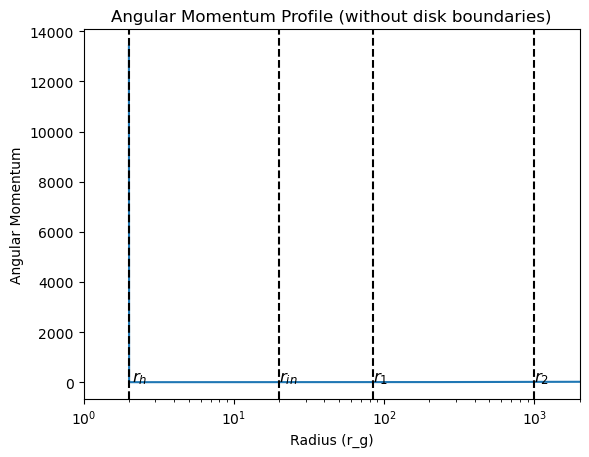

In [21]:
plt.plot(r_, l[:,int(n2/2),0])#*r_**(-0.5))
plt.xlim(1,2000)
plt.xscale('log')

plt.axvline(x = rh, color = 'black', linestyle = '--', label = 'r_h')
plt.text(rh+0.1,20,r'$r_h$',rotation=0, size='large')
plt.axvline(x = rin, color = 'black', linestyle = '--', label = 'r_in')
plt.text(rin+0.1,20,r'$r_{in}$',rotation=0, size='large')
plt.axvline(x = r1, color = 'black', linestyle = '--', label = 'r1')
plt.text(r1+0.1,20,r'$r_1$',rotation=0, size='large')
plt.axvline(x = r2, color = 'black', linestyle = '--', label = 'r2')
plt.text(r2+0.1,20,r'$r_2$',rotation=0, size='large')
#plt.axvline(x = 1000, color = 'black', linestyle = '--', label = 'rout')
#plt.text(1000+0.1,20,r'$r_{out}$',rotation=0, size='large')

plt.title("Angular Momentum Profile (without disk boundaries)")
plt.ylabel("Angular Momentum")
plt.xlabel("Radius (r_g)")

Text(0.5, 0, 'Radius (r_g)')

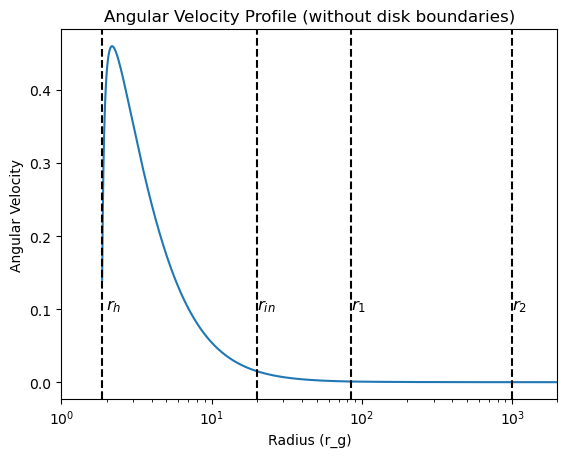

In [147]:
plt.plot(r_, omega[:,int(n2/2),0])#*r_**(-0.5))
plt.xlim(1,2000)
plt.xscale('log')

plt.axvline(x = rh, color = 'black', linestyle = '--', label = 'r_h')
plt.text(rh+0.1,0.1,r'$r_h$',rotation=0, size='large')
plt.axvline(x = rin, color = 'black', linestyle = '--', label = 'r_in')
plt.text(rin+0.1,0.1,r'$r_{in}$',rotation=0, size='large')
plt.axvline(x = r1, color = 'black', linestyle = '--', label = 'r1')
plt.text(r1+0.1,0.1,r'$r_1$',rotation=0, size='large')
plt.axvline(x = r2, color = 'black', linestyle = '--', label = 'r2')
plt.text(r2+0.1,0.1,r'$r_2$',rotation=0, size='large')
#plt.axvline(x = 1000, color = 'black', linestyle = '--', label = 'rout')
#plt.text(1000+0.1,20,r'$r_{out}$',rotation=0, size='large')

plt.title("Angular Velocity Profile (without disk boundaries)")
plt.ylabel("Angular Velocity")
plt.xlabel("Radius (r_g)")

In [148]:
I

1.00274572017927

Text(0.5, 0, 'Radius (r_g)')

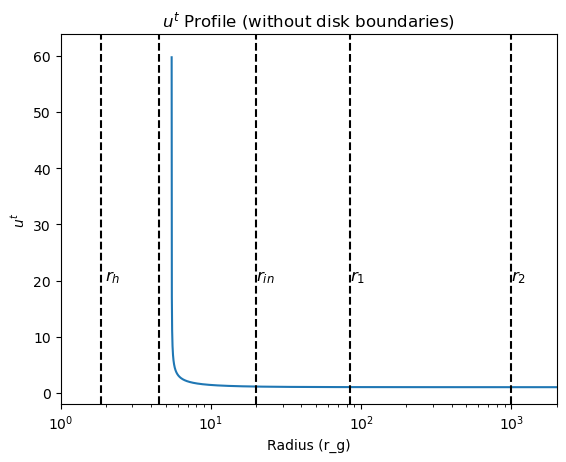

In [149]:
plt.plot(r_, A_[:,int(n2/2),0])#*r_**(-0.5))
plt.xlim(1,2000)
plt.xscale('log')

plt.axvline(x = rh, color = 'black', linestyle = '--', label = 'r_h')
plt.text(rh+0.1,20,r'$r_h$',rotation=0, size='large')
plt.axvline(x = rin, color = 'black', linestyle = '--', label = 'r_in')
plt.text(rin+0.1,20,r'$r_{in}$',rotation=0, size='large')
plt.axvline(x = r1, color = 'black', linestyle = '--', label = 'r1')
plt.text(r1+0.1,20,r'$r_1$',rotation=0, size='large')
plt.axvline(x = r2, color = 'black', linestyle = '--', label = 'r2')
plt.text(r2+0.1,20,r'$r_2$',rotation=0, size='large')
#plt.axvline(x = 1000, color = 'black', linestyle = '--', label = 'rout')
#plt.text(1000+0.1,20,r'$r_{out}$',rotation=0, size='large')
plt.axvline(x = 4.5, color = 'black', linestyle = '--', label = 'ISCO')

plt.title(r"$u^t$ Profile (without disk boundaries)")
plt.ylabel(r"$u^t$")
plt.xlabel("Radius (r_g)")

Text(0.5, 0, 'Radius (r_g)')

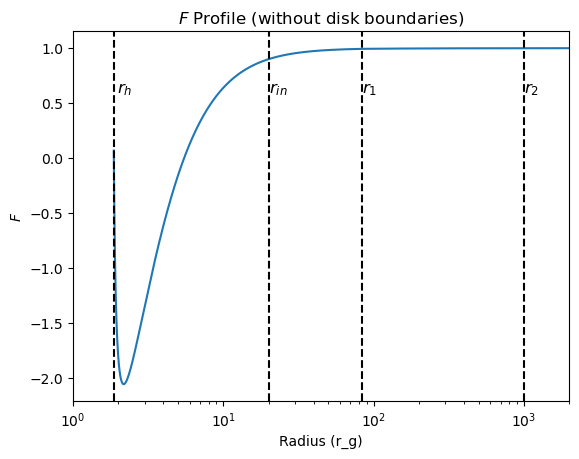

In [150]:
plt.plot(r_, F_[:,int(n2/2),0])#*r_**(-0.5))
plt.xlim(1,2000)
plt.xscale('log')

plt.axvline(x = rh, color = 'black', linestyle = '--', label = 'r_h')
plt.text(rh+0.1,0.6,r'$r_h$',rotation=0, size='large')
plt.axvline(x = rin, color = 'black', linestyle = '--', label = 'r_in')
plt.text(rin+0.1,0.6,r'$r_{in}$',rotation=0, size='large')
plt.axvline(x = r1, color = 'black', linestyle = '--', label = 'r1')
plt.text(r1+0.1,0.6,r'$r_1$',rotation=0, size='large')
plt.axvline(x = r2, color = 'black', linestyle = '--', label = 'r2')
plt.text(r2+0.1,0.6,r'$r_2$',rotation=0, size='large')
#plt.axvline(x = 1000, color = 'black', linestyle = '--', label = 'rout')
#plt.text(1000+0.1,20,r'$r_{out}$',rotation=0, size='large')

plt.title(r"$F$ Profile (without disk boundaries)")
plt.ylabel(r"$F$")
plt.xlabel("Radius (r_g)")

In [151]:
n2/4

100.0

(0.975, 1.1)

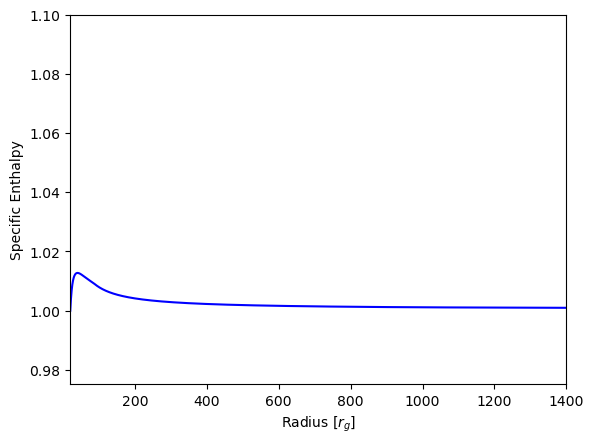

In [152]:
plt.plot(r_, w[:,int(n2/2), 0], color = 'blue')
#plt.plot(r_, -w[:,int(n2/2), 0], color = 'blue', linestyle="--")
plt.ylabel("Specific Enthalpy")
plt.xlabel("Radius [$r_g$]")


"""
plt.axvline(x = rh, color = 'black', linestyle = '--', label = 'r_h')
plt.text(rh+0.1,0.6,r'$r_h$',rotation=0, size='large')
plt.axvline(x = rin, color = 'black', linestyle = '--', label = 'r_in')
plt.text(rin+0.1,0.6,r'$r_{in}$',rotation=0, size='large')
plt.axvline(x = r1, color = 'black', linestyle = '--', label = 'r1')
plt.text(r1+0.1,0.6,r'$r_1$',rotation=0, size='large')
plt.axvline(x = r2, color = 'black', linestyle = '--', label = 'r2')
plt.text(r2+0.1,0.6,r'$r_2$',rotation=0, size='large')
#plt.axvline(x = 1000, color = 'black', linestyle = '--', label = 'rout')
#plt.text(1000+0.1,20,r'$r_{out}$',rotation=0, size='large')
"""


plt.xlim(rin,1400)

plt.ylim(0.975,1.1)
#plt.xscale('log')
#plt.yscale('log')

## Calculating Other Initial Quantities

### Internal Energy

In [153]:
gam = 1.44444444
eps = (w-1)/gam

Text(0.5, 0, 'Radius $[r_g]$')

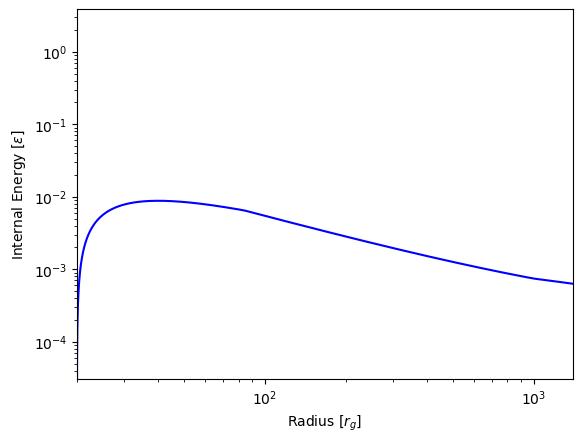

In [154]:
plt.plot(r_, eps[:,int(n2/2), 0], color = 'blue')
plt.plot(r_, -eps[:,int(n2/2), 0], color = 'blue', linestyle="--")
plt.xlim(rin,1400)

#plt.yscale('log')
plt.yscale('log')
plt.xscale('log')


plt.ylabel(r"Internal Energy $[\epsilon]$")
plt.xlabel(r"Radius $[r_g]$")

### Density Profile

In [155]:
k=1
rho = ((gam - 1)*eps/1)**(1/(gam-1))

/tmp/ipykernel_849808/3396740442.py:2: RuntimeWarning: invalid value encountered in power
  rho = ((gam - 1)*eps/1)**(1/(gam-1))


Text(0.5, 0, 'Radius $[r_g]$')

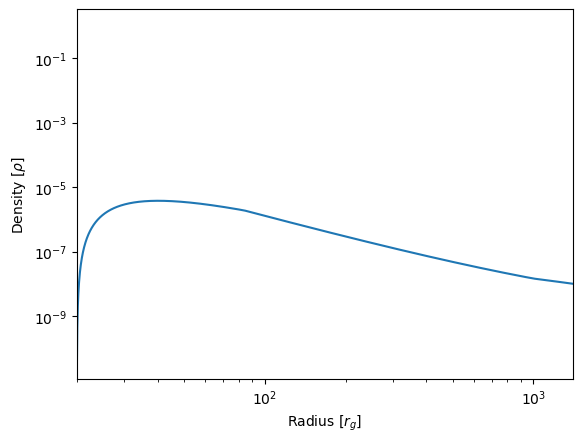

In [156]:
plt.plot(r_, rho[:,int(n2/2), 0])
plt.xlim(rin,1400)

plt.yscale('log')
plt.xscale('log')

plt.ylabel(r"Density $[\rho]$")
plt.xlabel(r"Radius $[r_g]$")

In [157]:
fmin = np.percentile(w,75)
fmax = np.percentile(w,25)


fmin
fmax

nan

## Contour Plots

/tmp/ipykernel_849808/2665606899.py:1: RuntimeWarning: divide by zero encountered in log
  lnh = np.log(w-1) *(r > rin)
/tmp/ipykernel_849808/2665606899.py:1: RuntimeWarning: invalid value encountered in log
  lnh = np.log(w-1) *(r > rin)
/tmp/ipykernel_849808/2665606899.py:12: UserWarning: No contour levels were found within the data range.
  ax.contour(x, y, lnh[:,:,0], [0.01])


Text(0.5, 1.0, '$\\ln(h)$')

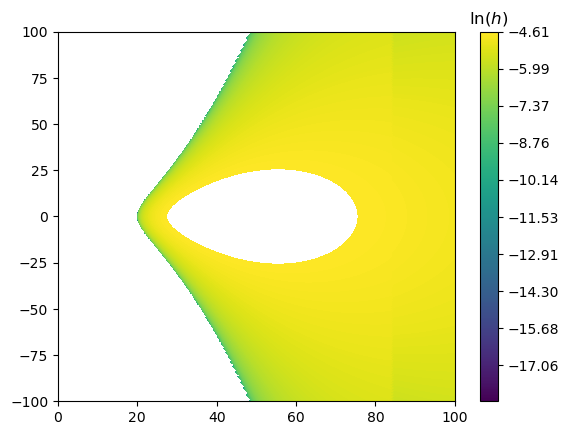

In [162]:
lnh = np.log(w-1) *(r > rin)

fmin = np.log(0.00000001)
fmax = np.log(0.01)
levels = np.linspace(fmin,fmax,500)

x = r[:,:,0]*np.sin(th[:,:,0])
y = r[:,:,0]*np.cos(th[:,:,0])

fig, ax = plt.subplots()
CS = ax.contourf(x, y, lnh[:,:,0], levels = levels)
ax.contour(x, y, lnh[:,:,0], [0.01])

plt.xlim(0,100)
plt.ylim(-100, 100)

cbar = fig.colorbar(CS)
cbar.ax.set_title(r'$\ln(h)$')
# Add the contour line levels to the colorbar

In [159]:
np.percentile(np.log10(rho), 0)

rho = rho*(r > 3.49)

/tmp/ipykernel_849808/2156169290.py:1: RuntimeWarning: divide by zero encountered in log10
  np.percentile(np.log10(rho), 0)
/home/vikrammanikantan/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


/tmp/ipykernel_838818/484617288.py:1: RuntimeWarning: divide by zero encountered in log10
  log_rho = np.log10(rho)
/tmp/ipykernel_838818/484617288.py:12: UserWarning: No contour levels were found within the data range.
  ax.contour(x, y, log_rho[:,:,0], [0.01])


Text(0.5, 1.0, '$\\log(\\rho)$')

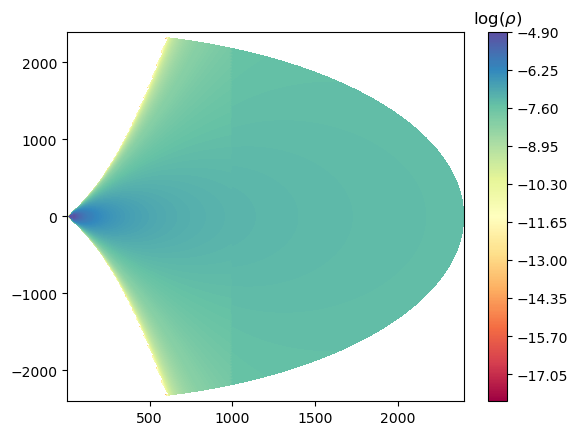

In [97]:
log_rho = np.log10(rho)

fmin = -8
fmax = -2
levels = np.linspace(fmin,fmax,500)

x = r[:,:,0]*np.sin(th[:,:,0])
y = r[:,:,0]*np.cos(th[:,:,0])

fig, ax = plt.subplots()
CS = ax.contourf(x, y, log_rho[:,:,0], cmap = 'Spectral', levels = 300)
ax.contour(x, y, log_rho[:,:,0], [0.01])



#plt.xlim(0,100)
#plt.ylim(-100,100)

cbar = fig.colorbar(CS)
cbar.ax.set_title(r'$\log(\rho)$')

/tmp/ipykernel_838818/2133876814.py:3: RuntimeWarning: divide by zero encountered in log10
  log_rho = np.log10(rho)
/tmp/ipykernel_838818/2133876814.py:14: UserWarning: No contour levels were found within the data range.
  ax.contour(x, y, log_rho[:,:,0], [0.01])


Text(0.5, 1.0, '$\\log(\\rho)$')

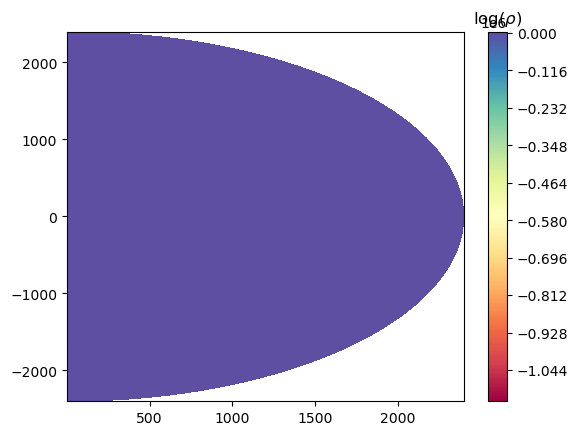

In [98]:
## Bernoulli Parameter

log_rho = np.log10(rho)

fmin = -8
fmax = -2
levels = np.linspace(fmin,fmax,500)

x = r[:,:,0]*np.sin(th[:,:,0])
y = r[:,:,0]*np.cos(th[:,:,0])

fig, ax = plt.subplots()
CS = ax.contourf(x, y, F_[:,:,0], cmap = 'Spectral', levels = 300)
ax.contour(x, y, log_rho[:,:,0], [0.01])



#plt.xlim(0,100)
#plt.ylim(-100,100)

cbar = fig.colorbar(CS)
cbar.ax.set_title(r'$\log(\rho)$')

In [69]:
Be = - A_*w - 1

/tmp/ipykernel_849808/1344857764.py:12: UserWarning: No contour levels were found within the data range.
  ax.contour(x, y, log_rho[:,:,0], [0.01])


Text(0.5, 1.0, '$\\log(Be)$')

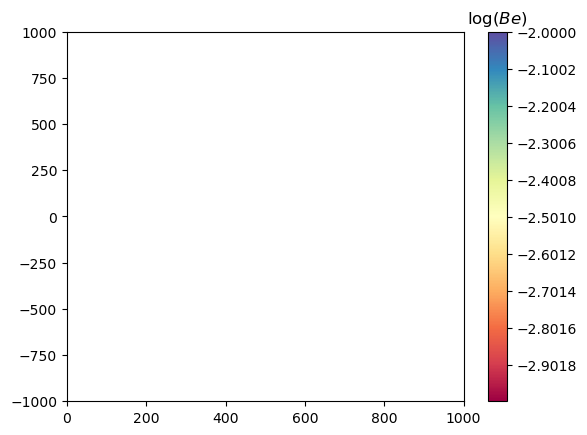

In [75]:
log_rho = np.log(-Be)

fmin = -3
fmax = -2
levels = np.linspace(fmin,fmax,500)

x = r[:,:,0]*np.sin(th[:,:,0])
y = r[:,:,0]*np.cos(th[:,:,0])

fig, ax = plt.subplots()
CS = ax.contourf(x, y, log_rho[:,:,0], cmap = 'Spectral', levels = levels)
ax.contour(x, y, log_rho[:,:,0], [0.01])



plt.xlim(0,1000)
plt.ylim(-1000,1000)

cbar = fig.colorbar(CS)
cbar.ax.set_title(r'$\log(Be)$')